# Homework Lecture 21
## Machine Learning and the OneR Algorithm

### Complete the One Rule Algorithm

http://www.saedsayad.com/oner.htm

In [1]:
%matplotlib inline
#matplotlib notebook

import numpy as np
import scipy as sp
from math import pi

from collections import OrderedDict
import pandas as pd

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

# Plot text color, uncomment 'black' for a light background
COLOR = 'white'
#COLOR = 'black'

plt.rcParams['axes.facecolor']= '#373e4b'
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR


In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
Y = dataset.target
# print(X)
# print(Y)
# print(dataset)
print(dataset.keys())
print(dataset['DESCR'])
# print(dataset(5,1))

Iris_data = OrderedDict({'Sepal Length ': X[:,0],
             'Sepal Width': X[:,1],
             'Petal Length': X[:,2],
             'Petal Width': X[:,3],
             'Label': Y})

df = pd.DataFrame(Iris_data)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1

In [3]:
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


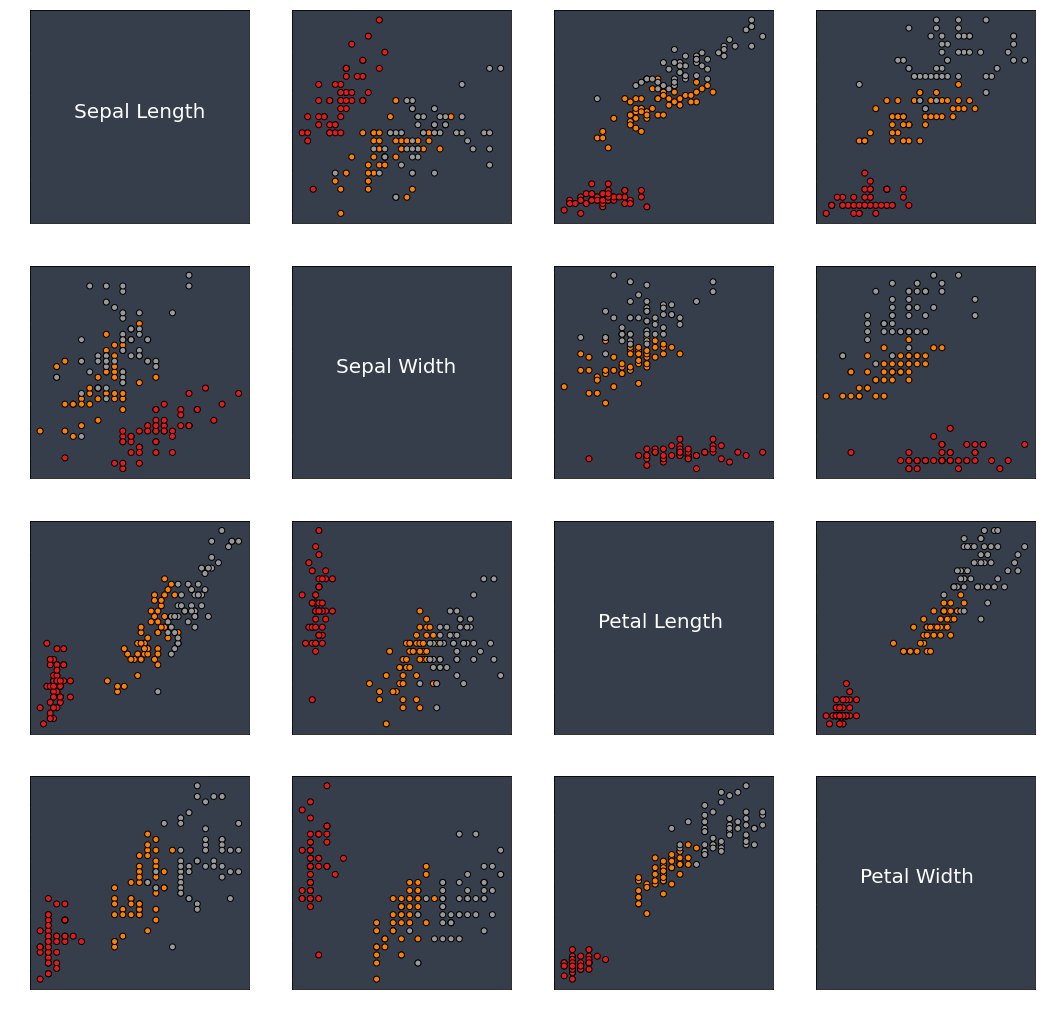

In [4]:
label = ['Sepal Length','Sepal Width','Petal Length','Petal Width']


fig, axarr = plt.subplots(4, 4)
fig.set_size_inches(18, 18)

for i in range(4):
    x1 = X[:,i]
    for j in range(4):
        x2 = X[:,j]
        if i == j:
            axarr[i,j].text(0.2, 0.5, label[i],fontsize=20)
        else:
            axarr[i,j].scatter(x1, x2, c=Y, cmap=plt.cm.Set1,edgecolor='k')
            
plt.show()

In [5]:
print('The mean of X:', X.mean(), '\n')

# X_mean = np.array([X[:,0].mean(), X[:,1].mean(), X[:,2].mean(), X[:,3].mean()])
X_mean = [X[:,x].mean() for x in range(4)]
X_d = np.array( X>X_mean, dtype='int')
print('The mean of each column:', X_mean, '\n')

# X_d = np.array( X>X.mean(), dtype='int')


Iris_data_d = OrderedDict({'Sepal Length ': X_d[:,0],
             'Sepal Width': X_d[:,1],
             'Petal Length': X_d[:,2],
             'Petal Width': X_d[:,3],
             'Label': Y})


print('Discretized Matrix:\n', X_d)
df_d = pd.DataFrame(Iris_data_d)
df_d

The mean of X: 3.4644999999999997 

The mean of each column: [5.843333333333334, 3.0573333333333337, 3.7580000000000005, 1.1993333333333336] 

Discretized Matrix:
 [[0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [0 0 1 1]
 [1 0 1 1]
 [0 0 1 1]
 [1 1 1 1]
 [0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 0 0]
 [1 0 1 1]
 [1 0 1 0]
 [1 0 1 1]
 [0 0 0 1]
 [1 1 1 1]
 [0 0 1 1]
 [0 0 1 0]
 [1 0 1 1]
 [0 0 1 0]
 [1 1 1 1]
 [1 0 1 1]
 [1 0 1 1]
 [1 0 1 1]
 [1 0 1 1]
 [1 0 1 1]


,Sepal Length,Sepal Width,Petal Length,Petal Width,Label
0,0,1,0,0,0
1,0,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
145,1,0,1,1,2
146,1,0,1,1,2
147,1,0,1,1,2
148,1,1,1,1,2


In [6]:
from sklearn.model_selection import train_test_split
Xd_train, Xd_test, Y_train, Y_test = train_test_split(X_d, Y)

df_Xd_train = pd.DataFrame(Xd_train, columns=label)
df_Xd_test = pd.DataFrame(Xd_test, columns=label)
df_Y_train = pd.DataFrame(Y_train)
df_Y_test = pd.DataFrame(Y_test)
df_Xd_train

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,0,1,0,0
1,0,0,1,1
2,1,1,1,1
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
107,1,1,1,1
108,1,0,1,1
109,1,0,1,1
110,0,1,0,0


In [7]:
df_Y_train

,0
0,0
1,1
2,1
3,0
4,1
...,...
107,2
108,2
109,1
110,0


In [8]:
# Sepal Length
"""
    A 2x3 Matrix
                         Label
                      0     1     2
                   __________________
                0  | 39  | 16  |  5  |   
   Sepal Length    |_____|_____|_____|
                1  |  0  | 19  | 33  |
                   |_____|_____|_____|

"""
freq_Sepal_Len = np.zeros((2,3))

count = 0
for x in range(len(Xd_train)):
    i = Xd_train[x][0]
    j = Y_train[x]
    
    freq_Sepal_Len[i][j] += 1

    count +=1
    
accuracy_Sepal_Len = 0

for x in range(3):
    accuracy_Sepal_Len += freq_Sepal_Len[:,x].max()
    
accuracy_Sepal_Len = accuracy_Sepal_Len/count

print('Sepal Length Frequency Matrix:\n\n', freq_Sepal_Len, '\n')
print('Test Count:', count)

print('\nAccuracy:', accuracy_Sepal_Len)

Sepal Length Frequency Matrix:

 [[38. 19.  5.]
 [ 0. 19. 31.]] 

Test Count: 112

Accuracy: 0.7857142857142857


In [9]:
"""
    A 2x3 Matrix
                         Label
                      0     1     2
                   __________________
                0  |  8  | 28  | 25  |   
   Sepal Width     |_____|_____|_____|
                1  | 31  |  7  | 13  |
                   |_____|_____|_____|

"""
freq_Sepal_Wid = np.zeros((2,3))

count = 0
for x in range(len(Xd_train)):
    i = Xd_train[x][1]
    j = Y_train[x]
    
    freq_Sepal_Wid[i][j] += 1

    count +=1

accuracy_Sepal_Wid = 0

for x in range(3):
    accuracy_Sepal_Wid += freq_Sepal_Wid[:,x].max()
    
accuracy_Sepal_Wid = accuracy_Sepal_Wid/count

print('Sepal Width Frequency Matrix:\n\n', freq_Sepal_Wid, '\n')
print('Test Count:', count)

print('\nAccuracy:', accuracy_Sepal_Wid)

Sepal Width Frequency Matrix:

 [[ 6. 32. 26.]
 [32.  6. 10.]] 

Test Count: 112

Accuracy: 0.8035714285714286


In [10]:
# Petal Length
"""
    A 2x3 Matrix
                         Label
                      0     1     2
                   __________________
                0  | 39  |  5  |  0  |   
   Petal Length    |_____|_____|_____|
                1  |  0  | 30  | 38  |
                   |_____|_____|_____|

"""
freq_Petal_Len = np.zeros((2,3))

count = 0
for x in range(len(Xd_train)):
    i = Xd_train[x][2]
    j = Y_train[x]
    
    freq_Petal_Len[i][j] += 1
    
    count +=1

accuracy_Petal_Len = 0

for x in range(3):
    accuracy_Petal_Len += freq_Petal_Len[:,x].max()
    
accuracy_Petal_Len = accuracy_Petal_Len/count

print('Petal Length Frequency Matrix:\n\n', freq_Petal_Len, '\n')
print('Test Count:', count)

print('\nAccuracy:', accuracy_Petal_Len)

Petal Length Frequency Matrix:

 [[38.  4.  0.]
 [ 0. 34. 36.]] 

Test Count: 112

Accuracy: 0.9642857142857143


In [11]:
# Petal Width
"""
    A 2x3 Matrix
                         Label
                      0     1     2
                   __________________
                0  | 39  |  7  |  0  |   
   Petal Length    |_____|_____|_____|
                1  |  0  | 28  | 38  |
                   |_____|_____|_____|

"""
freq_Petal_Wid = np.zeros((2,3))

count = 0
for x in range(len(Xd_train)):
    i = Xd_train[x][3]
    j = Y_train[x]
    
    freq_Petal_Wid[i][j] += 1
    
    count +=1

accuracy_Petal_Wid = 0

for x in range(3):
    accuracy_Petal_Wid += freq_Petal_Wid[:,x].max()
    
accuracy_Petal_Wid = accuracy_Petal_Wid/count    


print('Petal Width Frequency Matrix:\n\n', freq_Petal_Wid, '\n')
print('Test Count:', count)

print('\nAccuracy:', accuracy_Petal_Wid)

Petal Width Frequency Matrix:

 [[38.  7.  0.]
 [ 0. 31. 36.]] 

Test Count: 112

Accuracy: 0.9375


### Issues with the above algorithm
How can a set of two discrete values be used to determine the outcome of three different choices?
<br />
To rephrase, a 2x3 matrix does not have linearly independent rows, and cannot give definite and unique answers. A better option would be discritrize the data in such that each parameter point can have one of three values, say 0, 1, and 2. This points could be determined by giving data a standard deviation below the mean a value of 0, values a standard deviation above the mean get a value of 2, and values within a standard deviation of the mean get a value of 1.  


In [19]:
def disc(x, x_mean,x_std):
    """
    Args:
        x: data value
        x_mean: standard mean of the dataset, of which x is member
        x_std: standard deviation of the dataset, of which x is member
        
    Returns:
        value: discritized value of data
            x < x_mean-x_std: 0
            x_mean-x_std ≤ x ≤ x_mean-x_std: 1
            x < x_mean+x_std: 2
    """
#     value = 1
#     if x < (x_mean):
    if x < (x_mean - x_std):
        value = 0
    elif x > (x_mean + x_std):
        value = 2
    else:
        value = 1
    return value

# Acquire the the mean and standard devaition for each column of data
X_mean = [X[:,x].mean() for x in range(4)]
X_std = [X[:,x].std() for x in range(4)]

X_d3 = []

for i in range(len(X[:,0])):
    arr = []
    
    for j in range(len(X[0,:])):
        arr.append(disc(X[i,j], X_mean[j], X_std[j]))
    
    X_d3.append(arr)

X_d3

[[1, 2, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 2, 0, 0],
 [1, 2, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 2, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 2, 0, 0],
 [1, 2, 0, 0],
 [1, 2, 0, 0],
 [1, 2, 0, 0],
 [1, 2, 0, 0],
 [1, 2, 0, 0],
 [1, 1, 0, 0],
 [1, 2, 0, 0],
 [0, 2, 0, 0],
 [1, 1, 0, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 2, 0, 0],
 [1, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 1, 0, 0],
 [1, 2, 0, 0],
 [1, 2, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 2, 0, 0],
 [0, 2, 0, 0],
 [0, 1, 0, 0],
 [1, 1, 0, 0],
 [0, 2, 0, 0],
 [0, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 2, 0, 1],
 [1, 2, 0, 0],
 [0, 1, 0, 0],
 [1, 2, 0, 0],
 [0, 1, 0, 0],
 [1, 2, 0, 0],
 [0, 1, 0, 0],
 [2, 1, 1, 1],
 [1, 1, 1, 1],
 [2, 1, 1, 1],
 [1, 0, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1],
 [0, 0, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1],
 [0, 0, 1, 1],
 [1, 1, 1, 1],
 [1, 0, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1],
 [2, 1, 1, 1],
 [1, 1, 1,

#### Split the new three value discretized data

In [13]:
Xd3_train, Xd3_test, Y3_train, Y3_test = train_test_split(X_d3, Y)

df_Xd3_train = pd.DataFrame(Xd3_train, columns=label)
df_Xd3_test = pd.DataFrame(Xd3_test, columns=label)
df_Y3_train = pd.DataFrame(Y3_train)
df_Y3_test = pd.DataFrame(Y3_test)
df_Xd3_train

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,0,1,0,0
1,2,1,2,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
107,1,0,1,2
108,0,0,1,1
109,1,0,1,1
110,2,1,1,2


In [14]:
# Petal Width
"""
    A 2x3 Matrix
                         Label
                      0     1     2
                   __________________
                0  | 39  |  7  |  0  |   
   Petal Length    |_____|_____|_____|
                1  |  0  | 28  | 38  |
                   |_____|_____|_____|

"""
freq_Petal_Wid3 = np.zeros((3,3))

count = 0
for x in range(len(Xd3_train)):
    i = Xd3_train[x][3]
    j = Y3_train[x]
    
    freq_Petal_Wid3[i][j] += 1
    
    count +=1

accuracy_Petal_Wid3 = 0

for x in range(3):
    accuracy_Petal_Wid3 += freq_Petal_Wid3[:,x].max()
    
accuracy_Petal_Wid3 = accuracy_Petal_Wid3/count    


print('Petal Width Frequency Matrix:\n\n', freq_Petal_Wid3, '\n')
print('Test Count:', count)

print('\nAccuracy:', accuracy_Petal_Wid3)

Petal Width Frequency Matrix:

 [[31.  0.  0.]
 [ 1. 39. 18.]
 [ 0.  0. 23.]] 

Test Count: 112

Accuracy: 0.8303571428571429


In [15]:
freq_matrix=[]
test_count = []

for a in range(4):
    
    freq_3 = np.zeros((3,3))

    count = 0
    for x in range(len(Xd3_train)):
        i = Xd3_train[x][a]
        j = Y3_train[x]

        freq_3[i][j] += 1

        count +=1
    freq_matrix.append(freq_3)
    test_count.append(count)

accuracy = []
for b in range(4):
    max_ = 0
    for x in range(3):
        max_ += freq_matrix[b][:,x].max()

    accuracy.append(max_/test_count[b])   

accuracy

[0.6696428571428571,
 0.6785714285714286,
 0.8392857142857143,
 0.8303571428571429]

In [16]:
freq_matrix

[array([[18.,  3.,  1.],
        [14., 32., 25.],
        [ 0.,  4., 15.]]),
 array([[ 1., 13.,  6.],
        [17., 26., 33.],
        [14.,  0.,  2.]]),
 array([[32.,  0.,  0.],
        [ 0., 39., 23.],
        [ 0.,  0., 18.]]),
 array([[31.,  0.,  0.],
        [ 1., 39., 18.],
        [ 0.,  0., 23.]])]

### Choosing the appropriate algorithm

Looking at the above accuracy values and the corresponding matrices, both Petal Length and Petal Width appear to be good candidates for determining the Iris type. The higher value of the two appears to depend on the training set.

In [17]:
def OneR_Iris(x):
    idx = accuracy.index(max(accuracy))
    return x[idx]%3

predictions = []
for x in range(len(Xd3_test)):
    predictions.append(OneR_Iris(Xd3_test[x]))

predictions

pred_accuracy = 0
count = 0
for x in range(len(predictions)):
    if predictions[x]==Y3_test[x]:
        pred_accuracy +=1
    count +=1

pred_accuracy = 100*pred_accuracy/count

idx = accuracy.index(max(accuracy))
    
print('The', label[idx], 'set has the highest accuracy at',\
        round(accuracy[idx]*100, 1), '%.')

print('The overall success rate is:', round(pred_accuracy, 1), '%')

The Petal Length set has the highest accuracy at 83.9 %.
The overall success rate is: 94.7 %


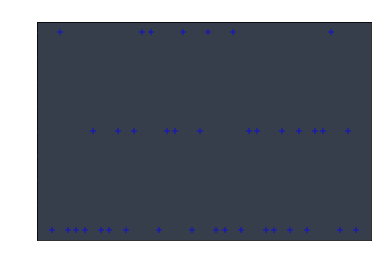

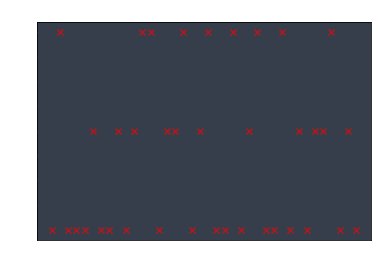

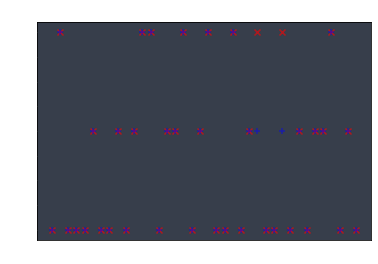

In [18]:
x= np.linspace(0, len(predictions), len(predictions))

# Display the Predicted values with a '+' symbol
plt.scatter(x, predictions, marker='+', alpha=.5, color='blue')
plt.title('Predicted Values')
plt.show()

# Display the Actual values with a 'x' symbol
plt.scatter(x, Y3_test, marker='x', alpha=.6, color='red')
plt.title('Actual Values')
plt.show()


plt.scatter(x, Y3_test, marker='x', alpha=.6, color='red')
plt.scatter(x, predictions, marker='+', alpha=.5, color='blue')
# plt.scatter(x, y_test, marker='x', alpha=.5, color='red')
plt.title('Overlay- Predicted (Blue) vs Actual (Red) Values')
plt.show()